In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
# import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# del(os.environ["KERAS_BACKEND"])
# print(os.environ["KERAS_BACKEND"])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set up directories

In [ ]:
from pathlib import Path
data_root = Path.home() / "data" / "tmp"
sample_dir = data_root / "cats_vs_dogs_sample"

# Train model from scratch

## Create model

In [ ]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#from keras.utils import multi_gpu_model
#model = multi_gpu_model(model, gpus=2)

Using plaidml.keras.backend backend.
INFO:plaidml:Opening device "metal_amd_radeon_pro_5500m.0"


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Create training data generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        str(sample_dir / "train"),
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        str(sample_dir / "validation"),
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fit model

In [ ]:
%%time
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 25s 249ms/step - loss: 0.6901 - acc: 0.5190 - val_loss: 0.6783 - val_acc: 0.5040
Epoch 2/30
100/100 [==============================] - 25s 254ms/step - loss: 0.6475 - acc: 0.6170 - val_loss: 0.6270 - val_acc: 0.6580
Epoch 3/30
100/100 [==============================] - 26s 259ms/step - loss: 0.5940 - acc: 0.6790 - val_loss: 0.6057 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 27s 267ms/step - loss: 0.5692 - acc: 0.6965 - val_loss: 0.6255 - val_acc: 0.6450
Epoch 5/30
100/100 [==============================] - 27s 268ms/step - loss: 0.5399 - acc: 0.7225 - val_loss: 0.5920 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 27s 265ms/step - loss: 0.5141 - acc: 0.7380 - val_loss: 0.5840 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 27s 272ms/step - loss: 0.4843 - acc: 0.7710 - val_loss: 0.67

In [ ]:
%%time
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 14s 136ms/step - loss: 0.6865 - acc: 0.5585 - val_loss: 0.6944 - val_acc: 0.5230
Epoch 2/30
100/100 [==============================] - 13s 128ms/step - loss: 0.6533 - acc: 0.6220 - val_loss: 0.6273 - val_acc: 0.6520
Epoch 3/30
100/100 [==============================] - 13s 126ms/step - loss: 0.5953 - acc: 0.6810 - val_loss: 0.6368 - val_acc: 0.6300
Epoch 4/30
 28/100 [=======>......................] - ETA: 7s - loss: 0.5739 - acc: 0.6857

KeyboardInterrupt: 

In [ ]:
import json

models_dir = data_root / "models" 
models_dir.mkdir(exist_ok=True)
model.save(str(models_dir / "cats_and_dogs_small_from_scratch.h5"))

history_path = models_dir / "cats_and_dogs_small_from_scratch_history.json"
with open(str(history_path), "w") as f:
    json.dump(history.history, f)

In [ ]:
history = json.load(open(str(history_path)))

## Plot training vs test accuracy

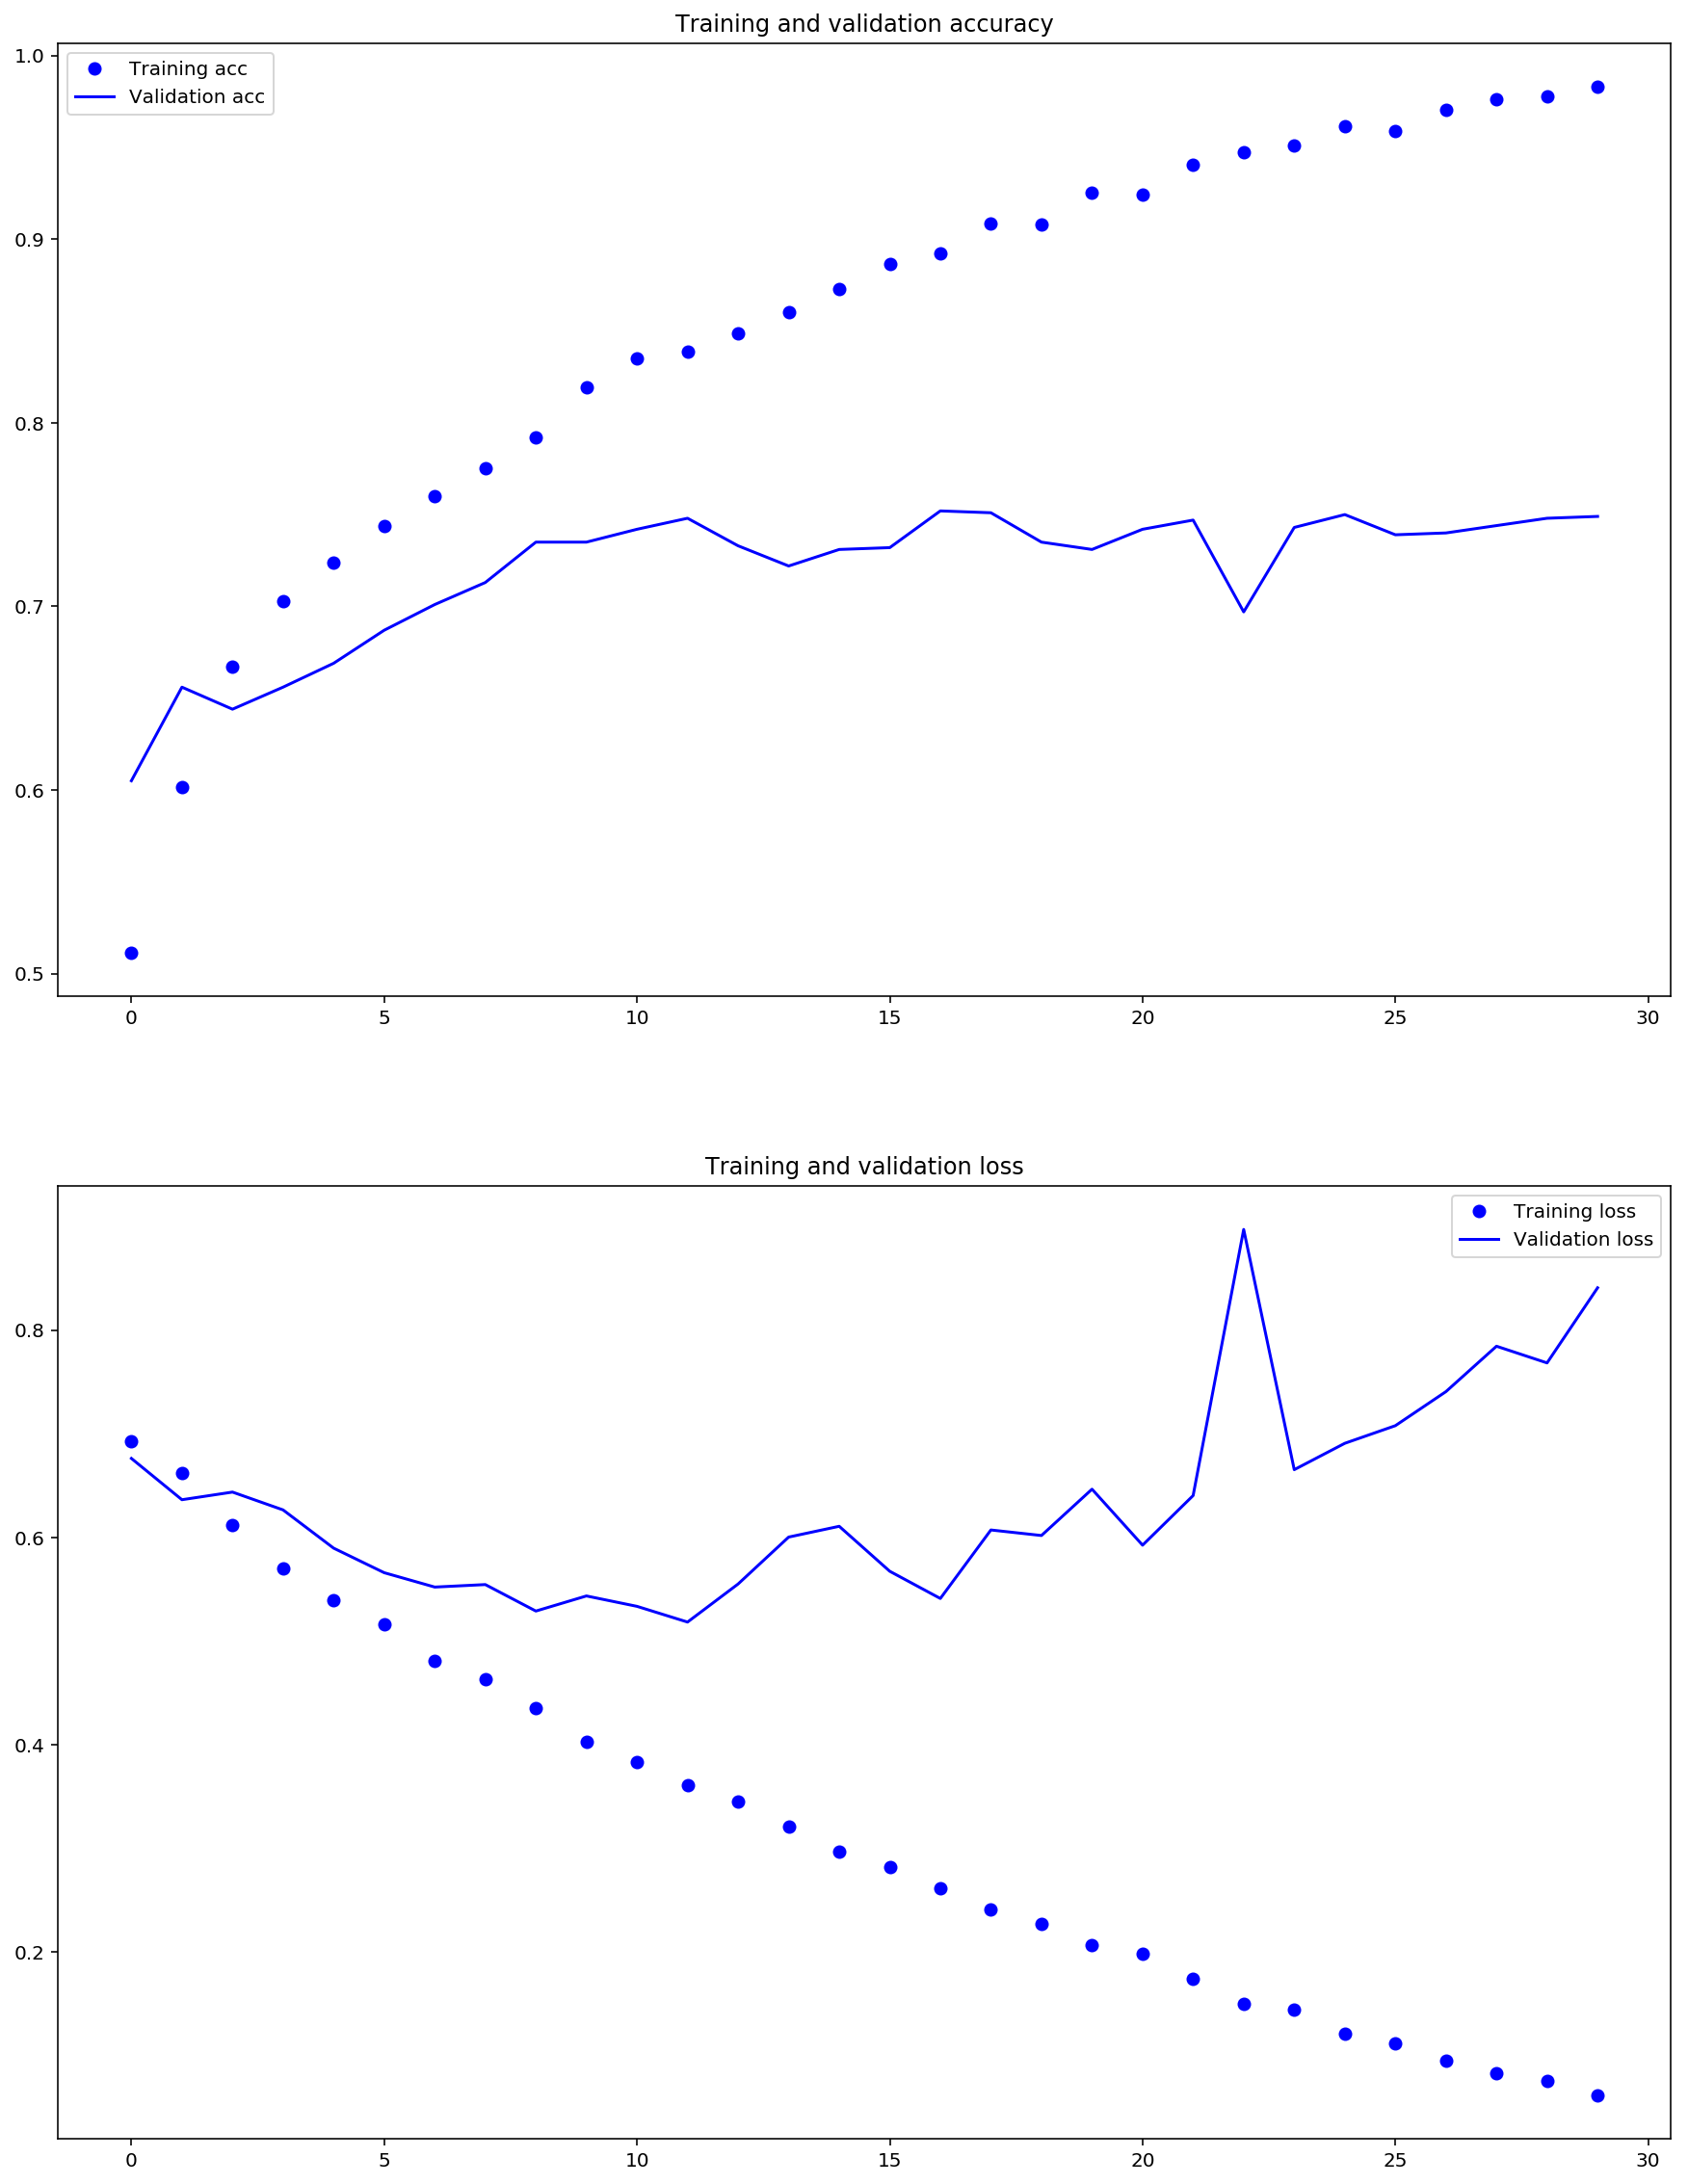

In [ ]:
import matplotlib.pyplot as plt

acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15, 20))

plt.subplot(211)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(212)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()